<a href="https://colab.research.google.com/github/VladislavasR/PP4/blob/main/PP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Start of the PP4

In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
!wget https://raw.githubusercontent.com/VladislavasR/PP4/main/electricity_prices.csv

--2022-08-17 15:52:21--  https://raw.githubusercontent.com/VladislavasR/PP4/main/electricity_prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4048368 (3.9M) [text/plain]
Saving to: ‘electricity_prices.csv’

electricity_prices. 100%[===================>]   3.86M  --.-KB/s    in 0.09s   

2022-08-17 15:52:22 (45.0 MB/s) - ‘electricity_prices.csv’ saved [4048368/4048368]



In [3]:
el_prices = pd.read_csv('electricity_prices.csv')
el_prices.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
el_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
el_prices = el_prices.replace('?', np.NaN)

In [6]:
el_prices['DateTime']=pd.to_datetime(el_prices['DateTime'], dayfirst=True)

In [8]:
# columns_to_numeric columns changes every time colab is restarted. Need to update which columns change to numeric on every load.
columns_to_numeric = ['ForecastWindProduction', 'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']
el_prices[columns_to_numeric] = el_prices[columns_to_numeric].apply(pd.to_numeric)

In [9]:
el_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38009 non-null  float64       
 10  SystemLoadEA            38012 non-null  float64       
 11  SMPEA                   38012 non-null  float64       
 12  ORKTemperature          37719 non-null  float6

In [10]:
el_prices.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

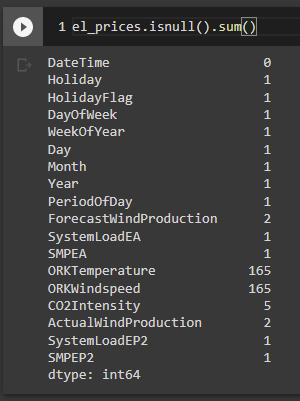

In [11]:
el_prices = el_prices.dropna()

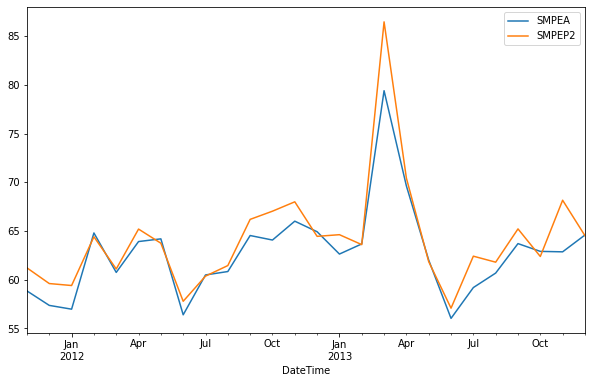

In [75]:
el_prices_plot = el_prices.set_index('DateTime')
el_prices_plot[['SMPEA','SMPEP2']].resample('M').mean().plot()

In [13]:
corr_data=el_prices.corr()[['SMPEP2']].sort_values(by='SMPEP2', ascending=False)

In [14]:
corr_data.head(10)

,SMPEP2
SMPEP2,1.000000
SMPEA,0.618158
SystemLoadEP2,0.517081
SystemLoadEA,0.491096
PeriodOfDay,0.323490
Year,0.045456
HolidayFlag,-0.001838
ORKTemperature,-0.009087
Day,-0.012801
Month,-0.014918


In [15]:
y = el_prices.SMPEP2

In [16]:
X_clean=el_prices[['SMPEA','SystemLoadEP2','SystemLoadEA', 'PeriodOfDay']]
X_train, X_valid, y_train, y_valid = train_test_split(X_clean, y)

In [50]:
clean_model = XGBRegressor(random_state=63, objective='reg:squarederror')
clean_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=63)

In [62]:
score = clean_model.score(X_train, y_train)  
print("Training score: ", score)

scores = cross_val_score(clean_model, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(clean_model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Training score:  0.5397351735177667
Mean cross-validation score: 0.49
K-fold CV average score: 0.49


In [63]:
clean_predictions_train = clean_model.predict(X_train)
mse = mean_squared_error(y_train, clean_predictions_train)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 566.44
RMSE: 23.80


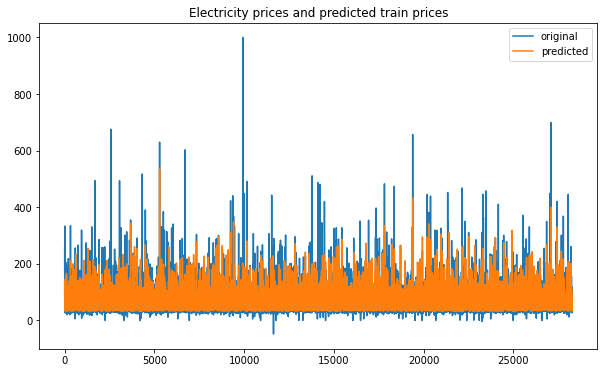

In [89]:
x_XGB_train = range(len(y_train))
plt.plot(x_XGB_train, y_train, label="original")
plt.plot(x_XGB_train, clean_predictions_train, label="predicted")
plt.title("Electricity prices and predicted train prices")
plt.legend()
plt.show()

In [51]:
clean_predictions = clean_model.predict(X_valid)
mae_XBG = mean_absolute_error(clean_predictions, y_valid)
mean_y = el_prices.SMPEP2.mean()
print('Mean Absolute Error: ' + str(mae_XBG))
print('prediction accuracy: ' + str(1 - mae_XBG/mean_y))

Mean Absolute Error: 14.015772846814315
prediction accuracy: 0.781622322001874


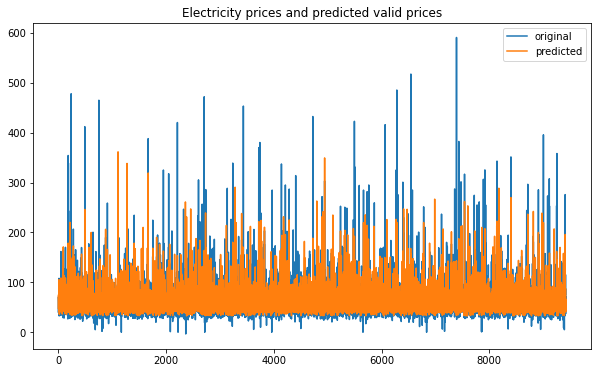

In [90]:
x_XGB_valid = range(len(y_valid))
plt.plot(x_XGB_valid, y_valid, label="original")
plt.plot(x_XGB_valid, clean_predictions, label="predicted")
plt.title("Electricity prices and predicted valid prices")
plt.legend()
plt.show()

In [81]:
clean_model_tuned_1 = XGBRegressor(n_estimators=200, learning_rate=0.05, objective='reg:squarederror')
clean_model_tuned_1.fit(X_train, y_train)
clean_predictions_tuned_1 = clean_model_tuned_1.predict(X_valid)
mae_XBG_tuned_1 = mean_absolute_error(clean_predictions_tuned_1, y_valid)
mean_y = el_prices.SMPEP2.mean()
print('Mean Absolute Error: ' + str(mae_XBG_tuned_1))
print('prediction accuracy: ' + str(1 - mae_XBG_tuned_1/mean_y))

Mean Absolute Error: 13.9897983378127
prediction accuracy: 0.7820270269742582


In [112]:
clean_model_tuned_2 = XGBRegressor(n_estimators=700, learning_rate=0.02, objective='reg:squarederror')
clean_model_tuned_2.fit(X_train, y_train)
clean_predictions_tuned_2 = clean_model_tuned_2.predict(X_valid)
mae_XBG_tuned_2 = mean_absolute_error(clean_predictions_tuned_2, y_valid)
print('Mean Absolute Error: ' + str(mae_XBG_tuned_2))
print('prediction accuracy: ' + str(1 - mae_XBG_tuned_2/mean_y))

Mean Absolute Error: 12.759042952683002
prediction accuracy: 0.8012032440923462


Manual tune with only 2 variables: n_estimators and learning_rate.

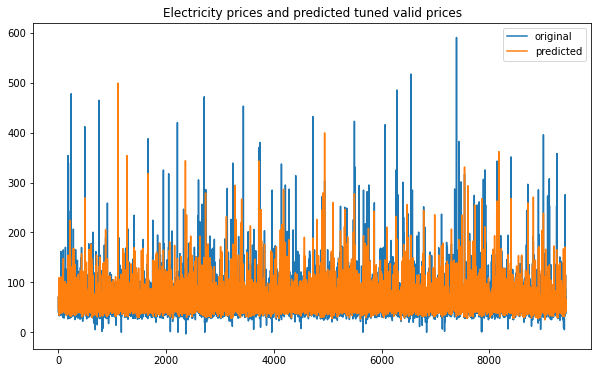

In [91]:
x_XGB_valid_tuned = range(len(y_valid))
plt.plot(x_XGB_valid_tuned, y_valid, label="original")
plt.plot(x_XGB_valid_tuned, clean_predictions_tuned_2, label="predicted")
plt.title("Electricity prices and predicted tuned valid prices")
plt.legend()
plt.show()

In [114]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 10)]
n_learning_rate = [float(x) for x in np.linspace(start = 0.05, stop = 0.5, num = 10)]

random_grid = {'n_estimators': n_estimators,
               'n_learning_rate': n_learning_rate}
XGB_random = RandomizedSearchCV(estimator = clean_model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=63, n_jobs = -1)
XGB_random.fit(X_train, y_train)
best_random_XGB = XGB_random.best_estimator_
best_random_XGB.fit(X_train, y_train)
best_random_XGB_preds = best_random_XGB.predict(X_valid)
best_random_XGB_mae = mean_absolute_error(y_valid, best_random_XGB_preds)
print(XGB_random.best_params_)
print('Mean Absolute Error: ' + str(best_random_XGB_mae))
print('prediction accuracy: ' + str(1 - best_random_XGB_mae/mean_y))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_learning_rate': 0.25, 'n_estimators': 500}
Mean Absolute Error: 12.387387657590686
prediction accuracy: 0.8069939501236882


Automatic tune with the same 2 variables.

In [92]:
forest_model = RandomForestRegressor(random_state=63)
forest_model.fit(X_train, y_train)
fores_preds = forest_model.predict(X_valid)
forest_mae = mean_absolute_error(y_valid, fores_preds)
print('Mean Absolute Error: ' + str(forest_mae))
print('prediction accuracy: ' + str(1 - forest_mae/mean_y))

Mean Absolute Error: 12.667549814244772
prediction accuracy: 0.8026287851126862


In [106]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = forest_model, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=63, n_jobs = -1)
rf_random.fit(X_train, y_train)
best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)
best_random_preds = best_random.predict(X_valid)
best_random_mae = mean_absolute_error(y_valid, best_random_preds)
print(rf_random.best_params_)
print('Mean Absolute Error: ' + str(best_random_mae))
print('prediction accuracy: ' + str(1 - best_random_mae/mean_y))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 358, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
Mean Absolute Error: 12.849688368500809
prediction accuracy: 0.7997909113124263


Random forest results vary greatly on each restart of Colab. At least for me.

In [107]:
full_model = el_prices.drop(['DateTime', 'SMPEP2', 'Holiday'],axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(full_model, y)

In [108]:
full_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37682 entries, 0 to 38013
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HolidayFlag             37682 non-null  int64  
 1   DayOfWeek               37682 non-null  int64  
 2   WeekOfYear              37682 non-null  int64  
 3   Day                     37682 non-null  int64  
 4   Month                   37682 non-null  int64  
 5   Year                    37682 non-null  int64  
 6   PeriodOfDay             37682 non-null  int64  
 7   ForecastWindProduction  37682 non-null  float64
 8   SystemLoadEA            37682 non-null  float64
 9   SMPEA                   37682 non-null  float64
 10  ORKTemperature          37682 non-null  float64
 11  ORKWindspeed            37682 non-null  float64
 12  CO2Intensity            37682 non-null  float64
 13  ActualWindProduction    37682 non-null  float64
 14  SystemLoadEP2           37682 non-null

In [110]:
XGB_model = XGBRegressor(random_state=63, objective='reg:squarederror')
XGB_model.fit(X_train, y_train)
predictions_XGB_full = XGB_model.predict(X_valid)
mae_XBG_full = mean_absolute_error(predictions_XGB_full, y_valid)
mean_y = el_prices.SMPEP2.mean()
print('Mean Absolute Error: ' + str(mae_XBG_full))
print('prediction accuracy: ' + str((mean_y - mae_XBG_full)/mean_y))

Mean Absolute Error: 12.848802081109005
prediction accuracy: 0.7998047204248295


In [111]:
forest_model_full = RandomForestRegressor(random_state=63, n_estimators=200)
forest_model_full.fit(X_train, y_train)
predictions_fmf = forest_model_full.predict(X_valid)
fmf_mae = mean_absolute_error(y_valid, predictions_fmf)
print('Mean Absolute Error: ' + str(fmf_mae))
print('prediction accuracy: ' + str(1 - fmf_mae/mean_y))

Mean Absolute Error: 8.563594788239042
prediction accuracy: 0.8665718997010176


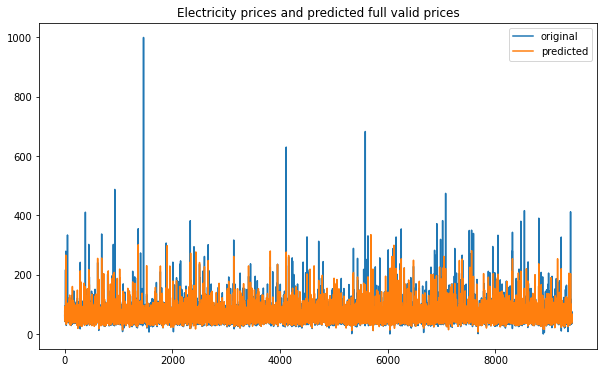

In [115]:
x_rf_full_data = range(len(y_valid))
plt.plot(x_rf_full_data, y_valid, label="original")
plt.plot(x_rf_full_data, predictions_fmf, label="predicted")
plt.title("Electricity prices and predicted full valid prices")
plt.legend()
plt.show()

Random forest with full data performs better thant XGB model. With clean data the difference between models is smaller. It seems that feeding more data points to models will benefit Random forest more. XGB on the other hand hardly improvesat all with more data points.

Main takeaway from this task is that finding the correct model for certain data will benefit you more than trying to tune wrong model to your data. But both tasks is time consuming and should be considered in yout assesment if you can use ML in your work.